# Getting Started

The top of Python files should always be a short documentation about the
content of the file, or "docstring".

This ipyton notebook is short demonstration of Python for scientific data analysis

This script covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Waiting for a keyboard-press
* Calculating confidence intervals for line-fits
* Saving figures

For such a short program, the definition of a "main" function, and calling
it by default when the module is imported by the main program, is a bit
superfluous. But it shows good Python coding style.

Author: Thomas Haslwanter, Feb-2017

# Modules and Packages

In [15]:
# To see the plots inline, even if you have not started the notebook 
# via "ipython notebook --pylab=inline"
% pylab inline

# Note: single comment lines are indicated by "#".

Populating the interactive namespace from numpy and matplotlib


In contrast to MATLAB, you explicitly have to load the modules that you need.
And don't worry here about not knowing the right modules: *numpy*, *scipy*, and
*matplotlib.pyplot* are almost everything you will need most of the time, and you
will quickly get used to those.

*pylab* automatically imports the most important components from numpy and
matplotlib into the current workspace.

# Sine Wave

In [16]:
# Create a sine-wave
t = arange(0,10,0.1)
x = sin(t)

# "arange" and "sin" are from the package "numpy". But since the command
# "pylab" already loaded "numpy" into the current workspace, they are known
# here.

# Next, save the data in a text-file, in column form.
# The formatting is a bit clumsy: data are by default row variables; so to
# get a matrix, you stack the two rows above each other, and then transpose
# the matrix.
outFile = 'test.txt'
savetxt(outFile, vstack([t,x]).T)

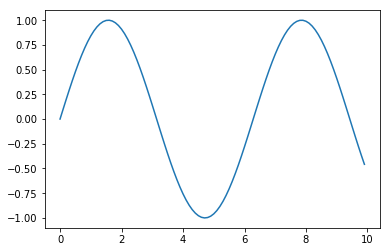

In [17]:
# Read the data into a different variable
inData = loadtxt(outFile)
t2 = inData[:,0] # Note that Python starts at "0"!
x2 = inData[:,1]

# Note: Python used (...) for function arguments, and [...] for indexing.

# Plot the data
plot(t,sin(t))

# Rotating a Vector

When working with vectors and matrices, keep the following things in mind
* By default, data are vectors.
* Use *array* when you want to generate matrices.

# Noisy Data and Linefits

Fit the following function: $y = k*x + d$

In [18]:
# Generate a noisy line
t = arange(-100,100)

# use a Python "dictionary" for named variables
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}
x = par['offset'] + par['slope']*t + par['noiseAmp']*randn(len(t))

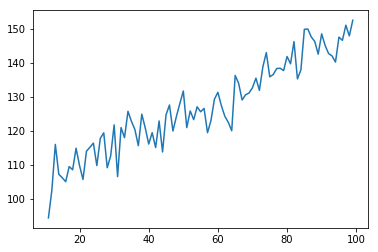

In [19]:
# Boolean indexing works in Python: select "late" values, i.e. with t>10
xHigh = x[t>10]
tHigh = t[t>10]

# Plot the "late" data
plot(tHigh, xHigh)

In [20]:
# Boolean indices can be combined:
x = arange(10)
topRange = x>2
bottomRange = x<8
x[topRange & bottomRange]

array([3, 4, 5, 6, 7])

   ## Fitting a line to the data

In [21]:
# Determine the best-fit line
# To do so, you have to generate a so-called Design Matrix, with "time" in the first
# column, and a column of "1" in the second column:
xMat = vstack((tHigh, ones(len(tHigh)))).T
slope, intercept = linalg.lstsq(xMat, xHigh)[0]

Fit line: intercept = 100.251, and slope = 0.488


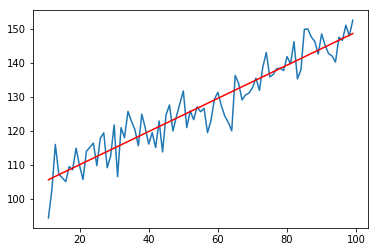

In [22]:
# Show and plot the fit, and save it to a PNG-file with a medium resolution.
# The "modern" way of Python-formatting is used
plot(tHigh, xHigh)
plot(tHigh, intercept + slope*tHigh, 'r')
savefig('linefit.png', dpi=200)
print('Fit line: intercept = {0:5.3f}, and slope = {1:5.3f}'.format(intercept, slope))

# Pandas

In [23]:
# If you want to know confidence intervals, best switch to *pandas*
# Pandas is mainly used for statistics and worksheet-like data
import pandas

# The calculation of OLS has been moved to *statsmodels* now
import statsmodels.formula.api as smf

# Note that this is an advanced topic, and requires new data structures
# such ad "DataFrames" and "ordinary-least-squares" or "ols-models".
myDict = {'x':tHigh, 'y':xHigh}
df = pandas.DataFrame(myDict)
model = smf.ols('y~x', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     671.9
Date:                Sat, 04 Feb 2017   Prob (F-statistic):           1.09e-42
Time:                        14:27:52   Log-Likelihood:                -260.40
No. Observations:                  89   AIC:                             524.8
Df Residuals:                      87   BIC:                             529.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.2512      1.143     87.697      0.0

# More Python Info on the Web

[http://scipy-lectures.github.com/](http://scipy-lectures.github.com/) Python Scientifc Lecture Notes. **If you read nothing else, read this!**

[http://wiki.scipy.org/NumPy_for_Matlab_Users/](http://wiki.scipy.org/NumPy_for_Matlab_Users/) Start here if you have lots of Matlab experience.

[https://docs.python.org/3.6/tutorial/](https://docs.python.org/3.6/tutorial/) The Python tutorial. The original introduction.

[http://jrjohansson.github.com/](http://jrjohansson.github.com/) Lectures on scientic computing with Python. Great ipython notebooks!